In [2]:
pip install basemap

In [9]:
pip install py3dep pynhd pygeohydro pydaymet pynldas2 hydrosignatures pygeoogc pygeoutils async-retriever

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.1/221.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [39]:
from numpy import random
from google.colab import files
from google.colab import  drive
from sklearn.feature_extraction.text import TfidfVectorizer
import io
import re
import unicodedata
import string
import numpy as np
import pandas as pd
import geopandas as gpd
import pygeohydro.watershed as pyhy

In [4]:
gdf = pyhy.huc_wb_full(12) # Takes a while to download full DB
new_gdf = gdf[["tohuc", "geometry"]].copy()
new_gdf['tohuc'] = pd.to_numeric(new_gdf['tohuc'], errors='coerce')
new_gdf.head()

,tohuc,geometry
0,1.090001e+10,"POLYGON ((-70.80939 42.70859, -70.80850 42.708..."
1,1.090001e+10,"POLYGON ((-70.91007 42.82164, -70.90971 42.821..."
2,1.080203e+10,"POLYGON ((-72.68933 42.54799, -72.68895 42.547..."
3,1.090001e+10,"POLYGON ((-71.02804 42.52280, -71.02745 42.522..."
4,1.090002e+10,"POLYGON ((-70.72244 41.94561, -70.72204 41.945..."


In [5]:
from google.colab import files

# Upload desired datasets
uploaded = files.upload()

Saving EnviroAtlas_BG_Demand-prepared.csv to EnviroAtlas_BG_Demand-prepared (1).csv


In [16]:
import io
fn = 'EnviroAtlas_BG_Demand-prepared (1).csv'
df = pd.read_csv(io.BytesIO(uploaded[fn]), skipinitialspace=True)
df.head()

,tohuc,BG_Demand
0,10100020101,193.684657
1,10100020102,131.876816
2,10100020103,205.000031
3,10100020104,99.943649
4,10100020105,349.578472


<Axes: >

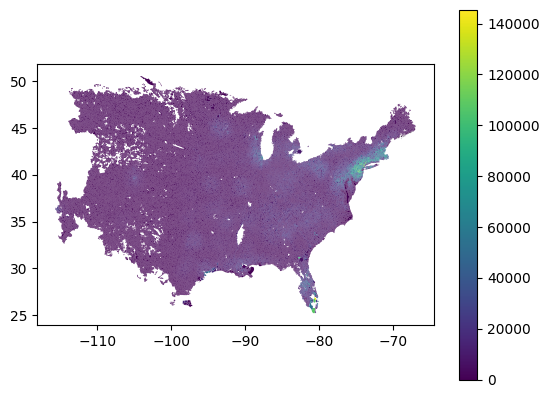

In [28]:
merged_gdf = new_gdf.merge(df, on='tohuc')
merged_gdf = merged_gdf.drop(merged_gdf[merged_gdf['BG_Demand'] > 200000].index) # Removing outliers so color gradient shows
merged_gdf.head()
merged_gdf.plot(column='BG_Demand', legend=True)